In [315]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling


In [316]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

KeyboardInterrupt: 

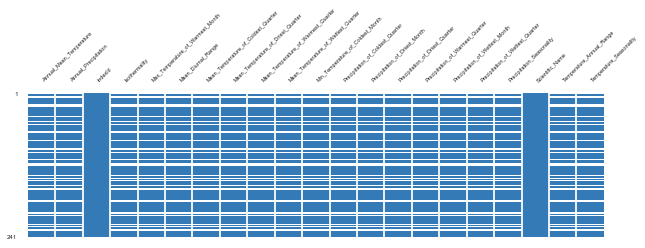

In [293]:
profile = train.profile_report(title='Haribon Profiling Report')
profile.to_file(output_file="haribon_pandas_profiling.html")

profile = test.profile_report(title='Test Haribon Profiling Report')
profile.to_file(output_file="test_haribon_pandas_profiling.html")

## Data Prep

In [317]:
# Test data for KNN

k_train = train
k_test = test
k_train = k_train.drop("indexId", axis=1)
k_test = k_test.drop("indexId", axis=1)

# Splitting for training

X_k_train = k_train.drop("Scientific Name", axis=1)
Y_k_train = k_train['Scientific Name']
X_k_train.head()

,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Annual Precipitation,Precipitation of Wettest Month,Precipitation of Driest Month,Precipitation Seasonality,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63.090,19.902,2432.0,25.639,117.493,420.0,7.148,25.357,462.0,178.0,896.0,11.330,26.975,52.334,31.232,53.0,305.0,26.028,23.993
3,66.983,20.849,2044.0,26.936,112.042,166.0,8.192,25.870,419.0,71.0,971.0,12.230,28.357,73.092,33.079,15.0,340.0,27.275,25.442
4,76.739,21.074,2113.0,26.943,63.116,569.0,9.091,27.528,589.0,429.0,663.0,11.847,27.757,26.627,32.921,135.0,298.0,27.095,26.139


### Feature engineering

In [140]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN", strategy="median", axis = 0)
imputer = imputer.fit(X_k_train)
X_k_train = pd.DataFrame(imputer.transform(X_k_train), columns = X_k_train.columns)
X_k_train.head()

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Mean Temperature of Wettest Quarter,Mean Temperature of Driest Quarter,Mean Temperature of Warmest Quarter,Mean Temperature of Coldest Quarter,Annual Precipitation,Precipitation of Wettest Month,Precipitation of Driest Month,Precipitation Seasonality,Precipitation of Wettest Quarter,Precipitation of Driest Quarter,Precipitation of Warmest Quarter,Precipitation of Coldest Quarter
0,72.574,21.074,2368.0,26.451,83.302,370.0,8.025,26.267,567.0,284.0,879.0,11.201,27.521,43.894,32.041,87.0,322.0,26.433,25.442
1,72.574,21.074,2368.0,26.451,83.302,370.0,8.025,26.267,567.0,284.0,879.0,11.201,27.521,43.894,32.041,87.0,322.0,26.433,25.442
2,63.090,19.902,2432.0,25.639,117.493,420.0,7.148,25.357,462.0,178.0,896.0,11.330,26.975,52.334,31.232,53.0,305.0,26.028,23.993
3,66.983,20.849,2044.0,26.936,112.042,166.0,8.192,25.870,419.0,71.0,971.0,12.230,28.357,73.092,33.079,15.0,340.0,27.275,25.442
4,76.739,21.074,2113.0,26.943,63.116,569.0,9.091,27.528,589.0,429.0,663.0,11.847,27.757,26.627,32.921,135.0,298.0,27.095,26.139


In [212]:
from sklearn import preprocessing 
X_k_train = pd.DataFrame(preprocessing.normalize(X_k_train), columns = X_k_train.columns)
k_test = pd.DataFrame(preprocessing.normalize(k_test), columns = k_test.columns)

In [319]:
Y_k_train.unique()

array(['Cacatua haematuropygia', 'Anas luzonica', 'Pithecophaga jeffeyri',
       'Alcedo argentata', 'Egretta eulophotes'], dtype=object)

In [320]:
Y_k_train = Y_k_train.replace(['Cacatua haematuropygia', 'Anas luzonica', 'Pithecophaga jeffeyri',
       'Alcedo argentata', 'Egretta eulophotes'],[1,2,3,4,5])

## KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_k_train, Y_k_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [119]:
knn.predict(k_test)

array([5, 1, 1, 1, 3, 1, 3, 3, 3, 5, 3, 3, 3, 1, 3, 2, 4, 3, 3, 1, 2, 3,
       3, 3, 1, 1, 1, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 1, 1, 3,
       5, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 1, 1, 3, 1, 2, 3, 1], dtype=int64)

## Alt

In [246]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

In [318]:
X_k_train = pd.DataFrame(fast_knn(X_k_train.values, k=30), columns = X_k_train.columns)

## Alt 2

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
sm = SMOTE(random_state=42)
x_out, y_out = sm.fit_resample(X_k_train, Y_k_train)

In [35]:
X_k_train = pd.DataFrame(x_out, columns = X_k_train.columns)
Y_k_train = pd.Series(y_out)

In [100]:
pred_stack = pd.DataFrame()

## XGBOOST

In [325]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [326]:
XG = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=8)
XG.fit(X_k_train, Y_k_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [327]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_k_train, Y_k_train) 
pred_stack['xg_out'] = svm_model_linear.predict(k_test) 


In [130]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance').fit(X_k_train, Y_k_train) 
pred_stack['knn_out'] = knn.predict(k_test)  


In [131]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e50, solver='liblinear').fit(X_k_train, Y_k_train) 
pred_stack['log_out'] = logreg.predict(k_test)  

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [300]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [308]:
rfe = RFE(estimator=RandomForestClassifier(random_state=36), n_features_to_select=18, verbose=1)
rfe.fit(X_k_train, Y_k_train)
rfe.predict(k_test) 

Fitting estimator with 19 features.


array([1, 5, 1, 1, 3, 3, 1, 3, 4, 5, 3, 3, 5, 1, 4, 2, 4, 3, 3, 2, 1, 1,
       3, 1, 1, 1, 2, 2, 1, 5, 5, 3, 3, 4, 3, 3, 3, 1, 2, 3, 3, 1, 1, 3,
       1, 1, 5, 1, 3, 1, 2, 5, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 4, 1, 1, 3,
       5, 1, 3, 3, 1, 2, 1, 1, 3, 3, 1, 3, 4, 5], dtype=int64)

# Results

In [322]:
output = test
output['Predicted'] = XG.predict(k_test) 
output = output[['indexId', 'Predicted']]

In [323]:
output['Predicted'] = output['Predicted'].replace([1,2,3,4,5],['Cacatua haematuropygia', 'Anas luzonica', 'Pithecophaga jeffeyri',
       'Alcedo argentata', 'Egretta eulophotes'])

In [324]:
output.to_csv('cohortII_haribon_predict.csv',  index=False)

In [166]:
output['Predicted']

0     Cacatua haematuropygia
1         Egretta eulophotes
2     Cacatua haematuropygia
3     Cacatua haematuropygia
4      Pithecophaga jeffeyri
5     Cacatua haematuropygia
6      Pithecophaga jeffeyri
7      Pithecophaga jeffeyri
8           Alcedo argentata
9         Egretta eulophotes
10     Pithecophaga jeffeyri
11     Pithecophaga jeffeyri
12        Egretta eulophotes
13    Cacatua haematuropygia
14          Alcedo argentata
15             Anas luzonica
16          Alcedo argentata
17     Pithecophaga jeffeyri
18          Alcedo argentata
19    Cacatua haematuropygia
20             Anas luzonica
21             Anas luzonica
22     Pithecophaga jeffeyri
23    Cacatua haematuropygia
24    Cacatua haematuropygia
25    Cacatua haematuropygia
26             Anas luzonica
27             Anas luzonica
28    Cacatua haematuropygia
29        Egretta eulophotes
               ...          
50             Anas luzonica
51             Anas luzonica
52     Pithecophaga jeffeyri
53     Pitheco

In [74]:
from sklearn.model_selection import cross_val_predict

In [78]:
stack = pd.DataFrame()

In [79]:
stack['xg_out']  = cross_val_predict(XG,X_k_train, Y_k_train)
stack['knn_out'] = cross_val_predict(knn,X_k_train, Y_k_train)
stack['log_out'] = cross_val_predict(logreg,X_k_train, Y_k_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [82]:
stack

,xg_out,knn_out,log_out
0,2,3,1
1,2,3,1
2,2,2,2
3,5,5,2
4,1,3,1
5,2,1,1
6,1,1,3
7,2,2,1
8,3,3,3
9,2,3,3


In [88]:
stacked = XG.fit(stack, Y_k_train)

In [132]:
stacked.predict(pred_stack)

array([2, 5, 1, 1, 3, 1, 3, 3, 3, 5, 3, 3, 5, 1, 3, 2, 3, 3, 4, 1, 2, 3,
       3, 1, 1, 1, 2, 3, 1, 5, 5, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 1, 1, 3,
       1, 1, 1, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3,
       3, 2, 3, 3, 3, 2, 3, 1, 1, 3, 3, 1, 1, 5], dtype=int64)

In [133]:
stacked

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)